# <span style="color:Black">Libraries Required</span>

In [26]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 
#The resulting plots will then also be stored in the notebook document.
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

# <span style="color:Black">Import Dataset</span>

In [27]:
train_table = pd.read_csv('train.csv')
print(train_table)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

# Descriptive Statistics
<p style="font-size:20px ; color:blue"><b>Correlation between the independent variables and the dependent variable, SalePrice.</b></p>

In [28]:
train_table.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [29]:
train_table_corr = train_table.corr()
train_table_corr.style

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

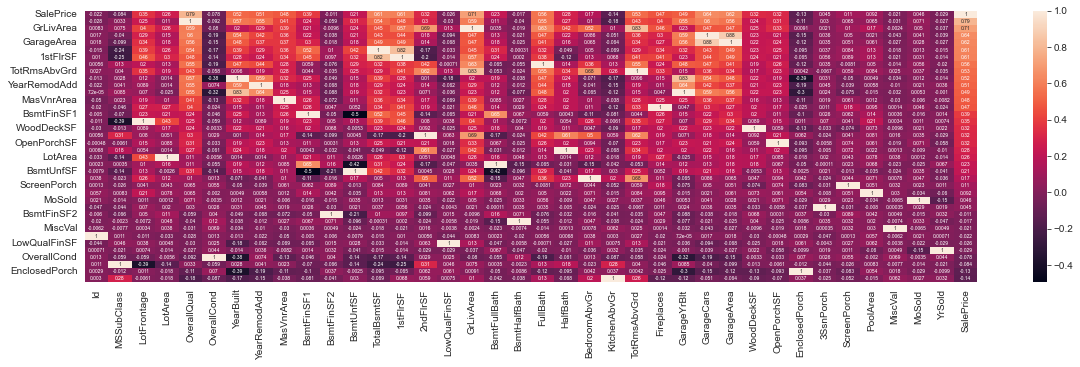

In [30]:
sns.heatmap(train_table_corr.sort_values('SalePrice',ascending = False),annot=True, annot_kws={'size': 5})
plt.show()

Since the correlation among 81 columns are too messy, Narrowing down the column to specific numeric columns and the "Sales price" to find the most correlated variables.

In [31]:
train_table_corr_related = train_table_corr[train_table_corr['SalePrice'] > 0.5]
train_table_corr_related_sales_price = train_table_corr_related[['SalePrice']]
train_table_corr_related_sales_price.sort_values('SalePrice', ascending = False).style

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


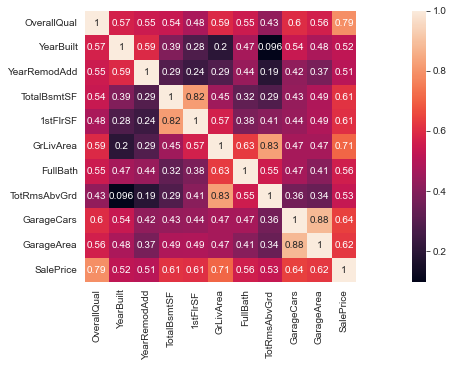

In [32]:
Variables = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd',
            'GarageCars','GarageArea','SalePrice'] 
sns.heatmap(train_table_corr_related[Variables], annot=True, square = True)
plt.show()

We found 10 independent variables most related to the sales price, which are 'OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars',
and 'GarageArea'.
However, since YearBuilt and YearRemodAdd; GarageCars and GarageArea; and TotalBsmtSF and 1stFlrSF share similar features and correlations, we will taget 'YearBuilt', 'GarageCars', 'TotalBsmtSF' instead.
In conclusion, we narrow down from 10 most related variables to 7, which are <b>'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars'</b>

In [33]:
#Although the YearBuilt is related to the SalePrice, let's convert YearBuilt into House_Ages by YrSold-YrBuilt.
#(more valuable numeric feature) #A lambda function is a small anonymous function. A lambda function can take any number of arguments, but can only have one expression.
new_train_table =train_table.assign(House_Ages = lambda x: train_table['YrSold']-train_table['YearBuilt'])
print(new_train_table)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscF

In [34]:
new_train_table_corr = new_train_table.corr()
new_train_table_corr.style

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,House_Ages
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,0.012724
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.028746
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,-0.122848
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.014832
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.572629
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,0.377325
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,-0.999036
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,-0.590360
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,-0.315562
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0

In [35]:
new_train_table_corr_related = new_train_table_corr[(new_train_table_corr['SalePrice'] < -0.5) | (new_train_table_corr['SalePrice'] > 0.5) ]
new_train_table_corr_related_sales_price = new_train_table_corr_related[['SalePrice']]
new_train_table_corr_related_sales_price.sort_values('SalePrice', ascending = False).style

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


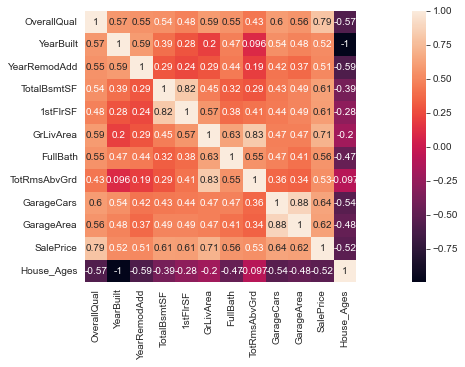

In [36]:
Variables1 = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd',
            'GarageCars','GarageArea','SalePrice','House_Ages'] 
sns.heatmap(new_train_table_corr_related[Variables1], annot=True, square = True)
plt.show()

After adding transforming the YearBuilt into the House_Ages, although the correlation level doesn't change, House_Ages allow us to do more numeric statistical analysis on. House_Ages also appear to be negative correlation because the younger the house is the more expensive it is. 
In conclusion, the 7 most related variables are <b>'OverallQual', 'House_Ages', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars'</b>

# <span style="color:Black">Data Cleansing</span>

In [37]:
new_train_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<p style="font-size:20px; color:red"><b>Deal with missing data.</b></p>

In [38]:
new_train_table.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns',inplace=True)
print(new_train_table)#remove the columns w/ more than half missing values

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea  \
0            Lvl    AllPub    Inside  ...      

In [39]:
train_series_null = new_train_table.isnull().sum().sort_values(ascending=False)
train_table_null = train_series_null.to_frame('sum_of_null')
train_table_isnull = train_table_null[train_table_null['sum_of_null'] > 0] 
#find the rest of missing values in each column
train_table_isnull.style

,sum_of_null
LotFrontage,259
GarageYrBlt,81
GarageType,81
GarageFinish,81
GarageQual,81
GarageCond,81
BsmtFinType2,38
BsmtExposure,38
BsmtQual,37
BsmtCond,37


Since the above columns w/ missing values don't conflict with the correlated variables we want : 'OverallQual', 'House_Ages', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', we could drop those variables easily. However there's only one missing row with column 'Electrical', so we will drop the row for this column.

In [40]:
new_train_table.drop(train_table_isnull[train_table_isnull['sum_of_null']>1].index,axis='columns',inplace=True)
#Drop the columns w/ missing values
new_train_table.dropna(subset=['Electrical'], inplace=True)
#Drop the row w/ missing values for column "Electrical"
new_train_table.isnull().sum()
#check if there's any missing values left

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
House_Ages       0
Length: 64, dtype: int64

<p style="font-size:20px; color:red"><b>Deal with Outliers (Numeric data)</b></p>

Remove the outliers for the numeric data correlated to the sale price variable.

In [41]:
Variables2 = ['OverallQual','TotalBsmtSF','GrLivArea','FullBath','TotRmsAbvGrd',
            'GarageCars','SalePrice','House_Ages']
related_train_numeric_table=new_train_table[Variables2]
Q1 = related_train_numeric_table.quantile(0.25)
Q3 = related_train_numeric_table.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

OverallQual         2.0
TotalBsmtSF       502.5
GrLivArea         648.5
FullBath            1.0
TotRmsAbvGrd        2.0
GarageCars          1.0
SalePrice       84050.0
House_Ages         46.0
dtype: float64


In [42]:
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR
Outliers = related_train_numeric_table[((related_train_numeric_table < Lower_Limit)|(related_train_numeric_table > Upper_Limit)).any(axis=1)]
no_outliers = related_train_numeric_table[~((related_train_numeric_table < Lower_Limit)|(related_train_numeric_table > Upper_Limit)).any(axis=1)]
print(no_outliers)
print(len(Outliers))
print(len(no_outliers) / len(related_train_numeric_table))

      OverallQual  TotalBsmtSF  GrLivArea  FullBath  TotRmsAbvGrd  GarageCars  \
0               7          856       1710         2             8           2   
1               6         1262       1262         2             6           2   
2               7          920       1786         2             6           2   
3               7          756       1717         1             7           3   
4               8         1145       2198         2             9           3   
...           ...          ...        ...       ...           ...         ...   
1455            6          953       1647         2             7           2   
1456            6         1542       2073         2             7           2   
1457            7         1152       2340         2             9           1   
1458            5         1078       1078         1             5           1   
1459            5         1256       1256         1             6           1   

      SalePrice  House_Ages

After outliers, there are still 90% observations in the data set for these correlated variables. 

<p style="font-size:20px; color:red"><b>Let's perform the EDA to check the Distribution to decide if One-Hot Encoding or Normalization is needed</b></p>

In [43]:
new_train_table.describe(include=['O']).T 
#summary all the object variables (TRANSPOSED)
#Find out the valuable categorical features for us to explore

,count,unique,top,freq
MSZoning,1459,5,RL,1150
Street,1459,2,Pave,1453
LotShape,1459,4,Reg,924
LandContour,1459,4,Lvl,1310
Utilities,1459,2,AllPub,1458
LotConfig,1459,5,Inside,1051
LandSlope,1459,3,Gtl,1381
Neighborhood,1459,25,NAmes,225
Condition1,1459,9,Norm,1259
Condition2,1459,8,Norm,1444


After pulling out the summary of all the categorical columns, we can disregard the columns with over 1000 data in one category, which is not very meaningful.
And we will start to do EDA boxplots to find out their relationship between sales price in order to decide to move forward for the one-hot encoding.

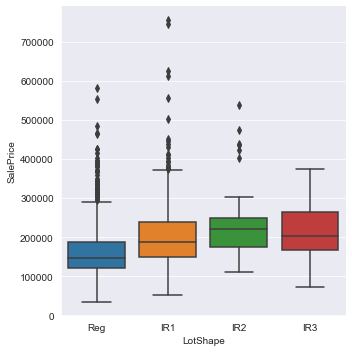

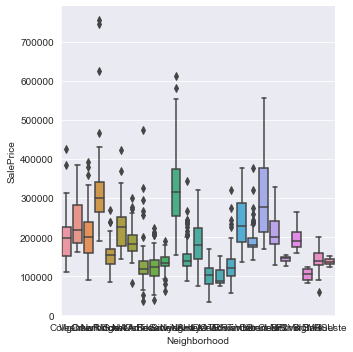

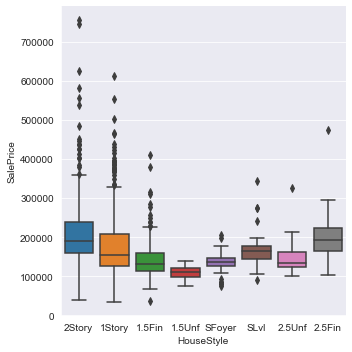

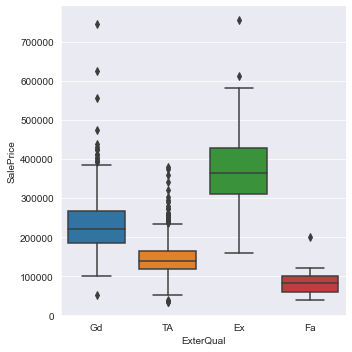

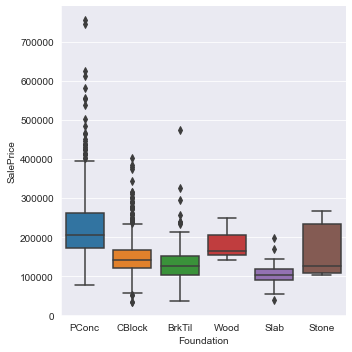

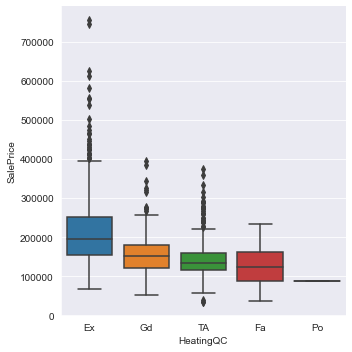

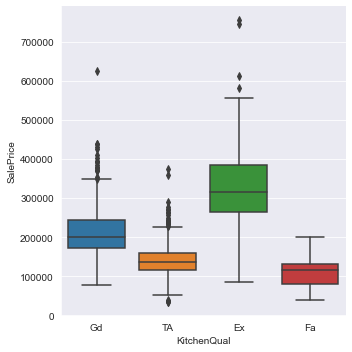

In [44]:
Potent_cat_var = ['LotShape', 'Neighborhood', 'HouseStyle', 'ExterQual','Foundation','HeatingQC','KitchenQual']
def box(x_var, y_var, kind_char, data_table):
    sns.catplot(x=x_var,y=y_var,kind=kind_char,data=data_table)
    plt.show()

for item in Potent_cat_var:
    box(item,'SalePrice','box',new_train_table)

A few categorical variables have been identified might have the relationship with our dependent variable including <b>'LotShape', 'ExterQual','HeatingQC','KitchenQual'</b>.

Recalling from our previous identified the most correlated variables, some variables were <b>continuous categorical data such as 'OverallQual','FullBath','TotRmsAbvGrd','GarageCars' </b>while the rest are numeric data such as 'House_Ages', 'TotalBsmtSF', and 'GrLivArea'.

Let's first check the Boxplots for the continuous categorical data.

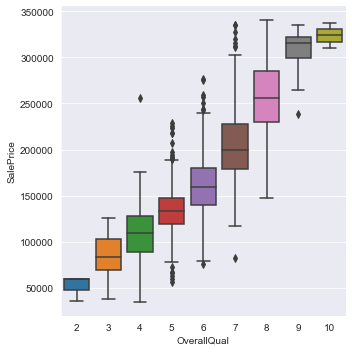

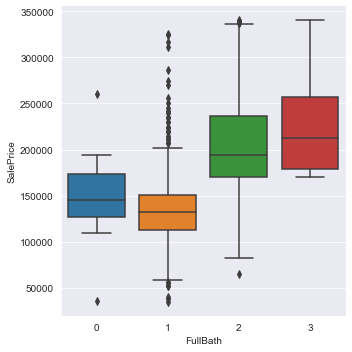

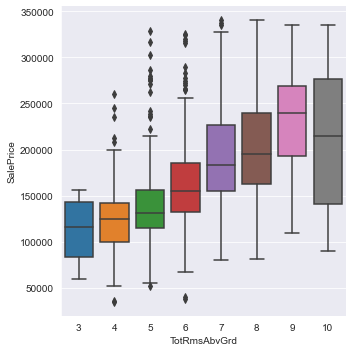

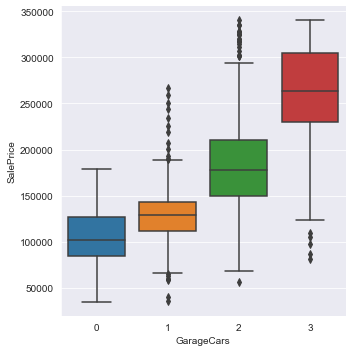

In [45]:
cont_discrete_var = ['OverallQual','FullBath','TotRmsAbvGrd','GarageCars'] 

def box(x_var, y_var, kind_char, data_table):
    sns.catplot(x=x_var,y=y_var,kind=kind_char,data=data_table)
    plt.show()

for item in cont_discrete_var:
    box(item,'SalePrice','box',no_outliers)

Next, we check the distribution for the numeic variables.

/Users/alex5629684/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


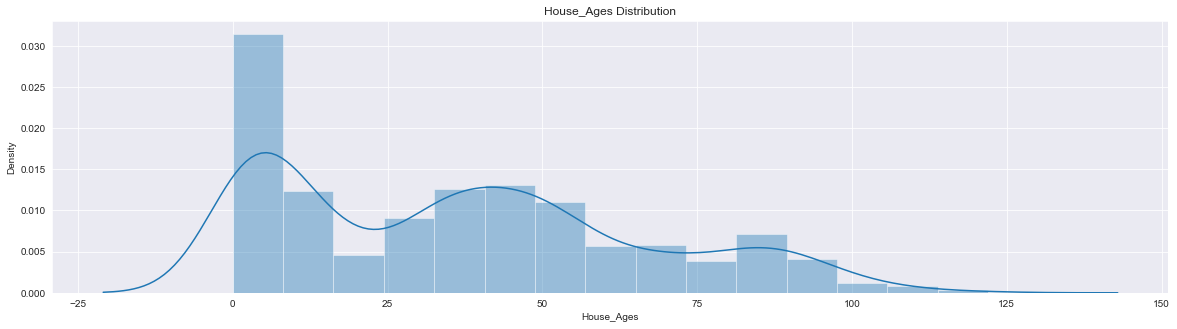

/Users/alex5629684/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


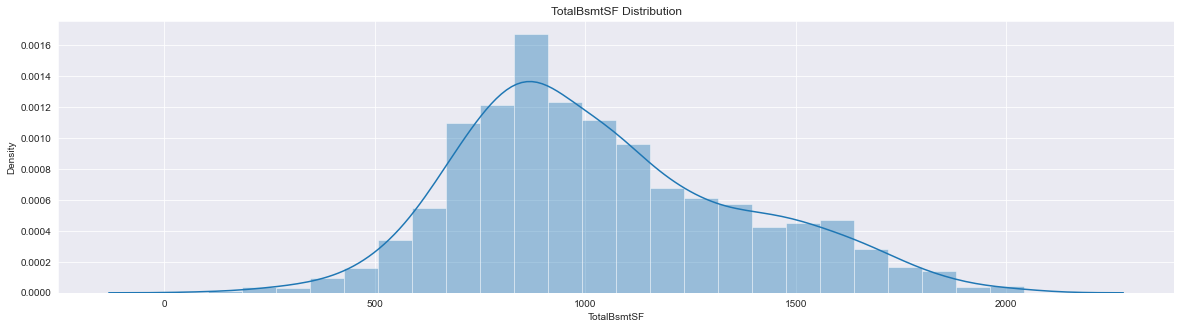

/Users/alex5629684/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


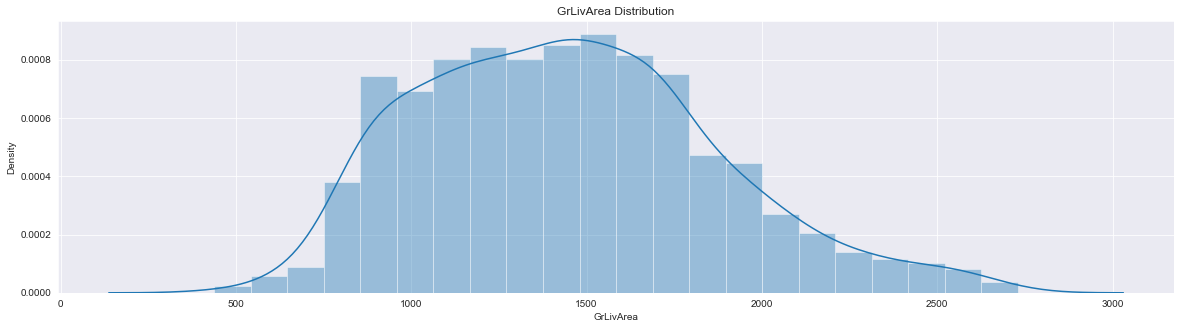

In [46]:
Numeric_distribution = ['House_Ages', 'TotalBsmtSF','GrLivArea'] 
for item in Numeric_distribution:
    sns.distplot(no_outliers[item])
    plt.title(item+' '+'Distribution')
    plt.show()

<p>Next, we check the relationship between numeric independent variable and the dependent variable with the scatter plot.</p> 

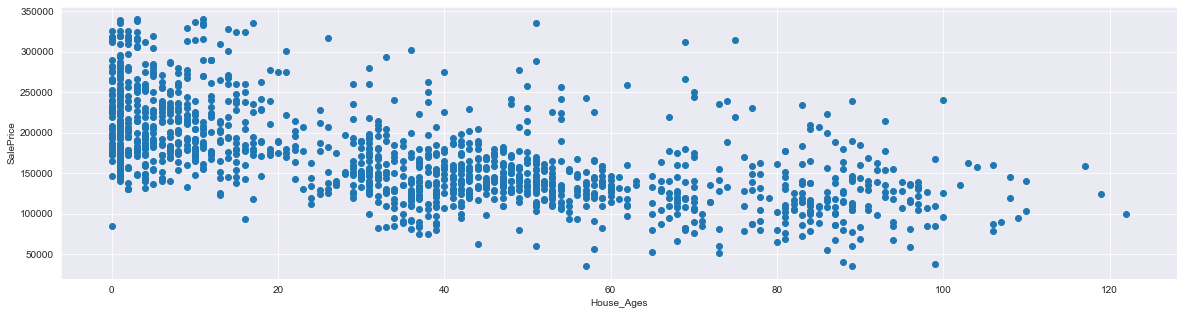

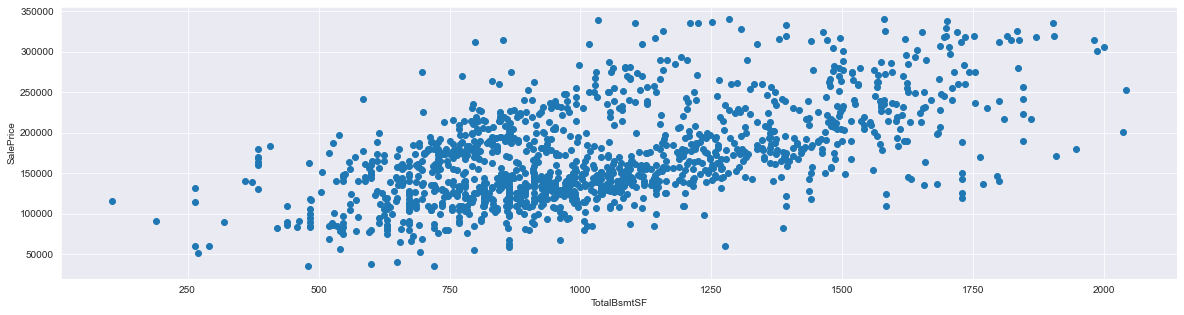

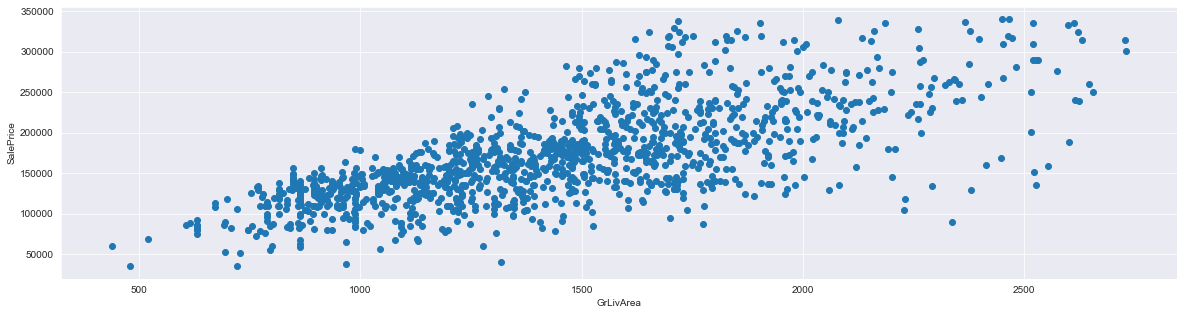

In [47]:
def scattered(ax, x, y, xlabel, ylabel):
    ax.scatter(x,y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    
for item in Numeric_distribution:
    fig, ax = plt.subplots()
    scattered(ax, no_outliers[item], no_outliers['SalePrice'], item, 'SalePrice')

Now we know the distribution is skewed, so we will do the normalizarion on the numeric variables.
But first we need to perform one-hot encoding on the categorical variables.

After removing the outliers, all these independent variables including the categorical and the numeric have clearly positive relationship, house age negative relationship, with the dependent variable, Sales Price.
Right now, we will focus on the <b> One-Hot Encoding & Normalization</b> to make sure each variable have the same scale betweem 0,1.

<p style="font-size:20px; color:red"><b>Deal with Categorical Variables - One-Hot Encoding</b></p>

<p style="font-size:20px ; color:blue"><b>One-Hot Encoding for multiple categorical variable</b></p>

In [48]:
discrete_var = ['OverallQual','FullBath','TotRmsAbvGrd','GarageCars','LotShape', 'ExterQual','HeatingQC','KitchenQual'] 
one_hot_train = new_train_table[discrete_var].copy() #copy to a new table
new_train_table_transformed_with_dummies = pd.get_dummies(data=one_hot_train, columns=discrete_var, drop_first=True)
print(new_train_table_transformed_with_dummies) #the new dummies columns were craeted to the new data frame

      OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1455              0              0              0              0   
1456              0              0              0              0   
1457              0              0              0              0   
1458              0              0              0              1   
1459              0              0              0              1   

      OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  \
0                 0              1              0              0   
1                 1              0             

<p style="font-size:20px; color:red"><b>Deal with Numeric Variables - Normalization</b></p>

In [49]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
# No need to normalize the dependent variable
Numeric_distribution_normalized = ['House_Ages', 'TotalBsmtSF','GrLivArea'] 
norm = MinMaxScaler().fit(no_outliers[Numeric_distribution_normalized])
# transform training data
X_train_norm = norm.transform(no_outliers[Numeric_distribution_normalized])
#convert the np.array into df
X_train_norm_table = pd.DataFrame(X_train_norm, columns = Numeric_distribution_normalized)
#merge the dependent variable back to the nomrlaized dataframe
train_norm_table = pd.concat([X_train_norm_table, no_outliers[['SalePrice']]], axis=1)
print(train_norm_table)

      House_Ages  TotalBsmtSF  GrLivArea  SalePrice
0       0.040984     0.387713   0.554974   208500.0
1       0.254098     0.597315   0.359511   181500.0
2       0.057377     0.420754   0.588133   223500.0
3       0.745902     0.336087   0.558028   140000.0
4       0.065574     0.536913   0.767888   250000.0
...          ...          ...        ...        ...
1455         NaN          NaN        NaN   175000.0
1456         NaN          NaN        NaN   210000.0
1457         NaN          NaN        NaN   266500.0
1458         NaN          NaN        NaN   142125.0
1459         NaN          NaN        NaN   147500.0

[1446 rows x 4 columns]


In [50]:
# data normalization from scratch
#min_norm = np.min(no_outliers[Numeric_distribution_normalized])
#max_norm = np.max(no_outliers[Numeric_distribution_normalized])
#Numeric_normalized = max_norm - min_norm
#normalized = (no_outliers[Numeric_distribution_normalized] - min_norm)/Numeric_normalized
#print(normalized)

In [51]:
#Try the standardization
#no_outliers[['House_Ages', 'TotalBsmtSF','GrLivArea']]
#dx = no_outliers[['House_Ages', 'TotalBsmtSF','GrLivArea']] - np.mean(no_outliers[['House_Ages', 'TotalBsmtSF','GrLivArea']])
#dy = no_outliers['SalePrice'] - np.mean(no_outliers['SalePrice'])
#zx = dx/np.std(no_outliers[['House_Ages', 'TotalBsmtSF','GrLivArea']])
#zy = dy/np.std(no_outliers['SalePrice'])
#print(zx)

/Users/alex5629684/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


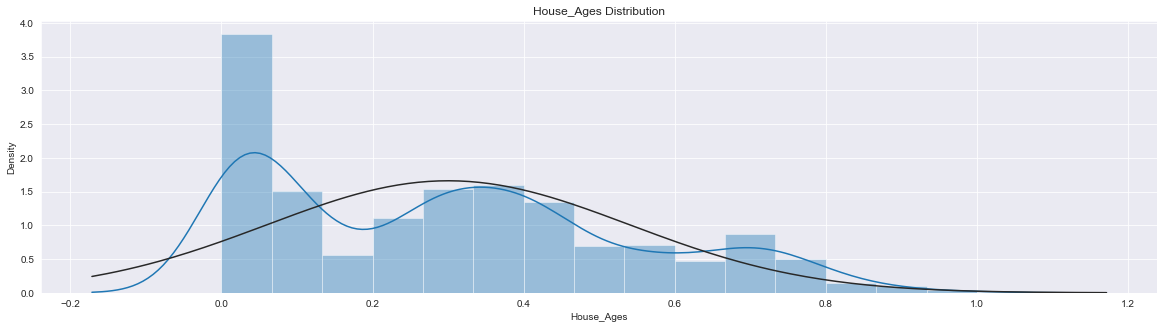

/Users/alex5629684/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


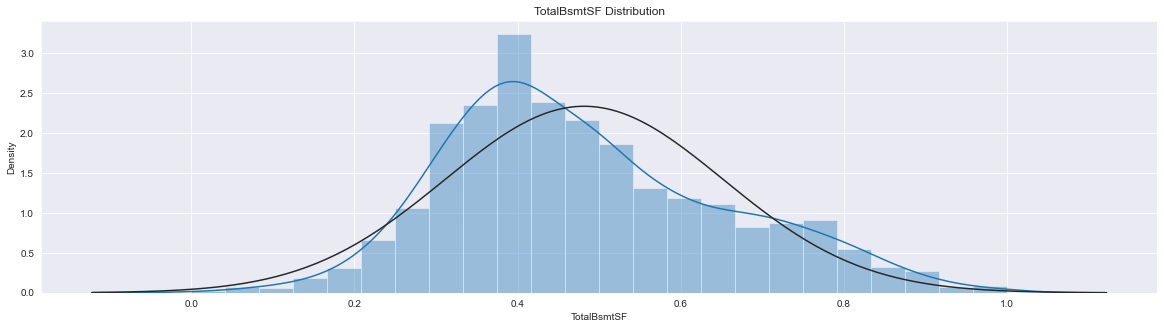

/Users/alex5629684/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


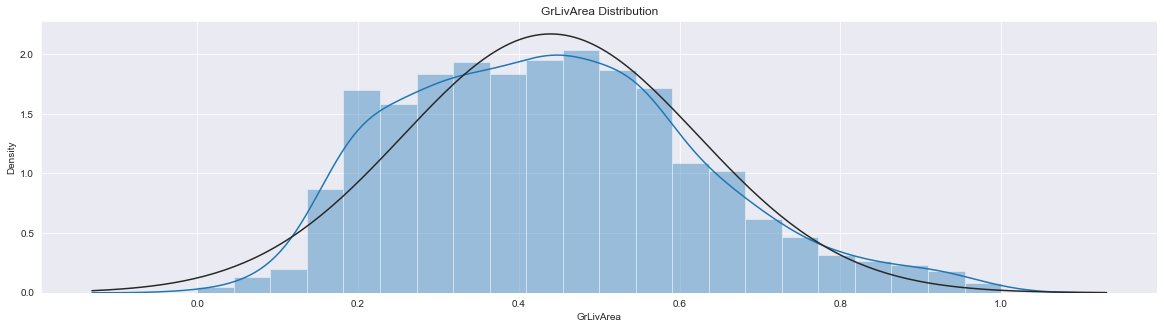

In [52]:
#check if the distribution is normal distributed.
Numeric_distribution = ['House_Ages', 'TotalBsmtSF','GrLivArea']
from scipy.stats import norm
for item in Numeric_distribution:
    sns.distplot(X_train_norm_table[item],fit=norm)
    plt.title(item+' '+'Distribution')
    plt.show()

In [53]:
#combine the categorical columns and numeric columns after one_hot encoding and the normalizations
ready_train = pd.concat([train_norm_table, new_train_table_transformed_with_dummies], axis=1)
ready_train.dropna(subset=Numeric_distribution_normalized, inplace=True)
#Drop the row w/ missing values for the numeric columns
#no missing values anymore
ready_train.dropna(subset=['SalePrice'], inplace=True)
ready_train.isnull().sum()
ready_train

,House_Ages,TotalBsmtSF,GrLivArea,SalePrice,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,0.040984,0.387713,0.554974,208500.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0.254098,0.597315,0.359511,181500.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0.057377,0.420754,0.588133,223500.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0.745902,0.336087,0.558028,140000.0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,0.065574,0.536913,0.767888,250000.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,0.065574,0.437790,0.527487,333168.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1314,0.262295,0.741869,0.713351,119000.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1315,0.565574,0.540527,0.829843,206900.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1316,0.491803,0.502323,0.279232,295493.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# <span style="color:Black">Insights</span>

Although the correlated variables are not normal distributed, we don’t have to transform our observed variables just because they don’t follow a normal distribution. Linear regression analysis, which includes t-test and ANOVA, does not assume normality for either predictors (IV) or an outcome (DV).

<p style="font-size:20px; color:red"><b>Linear Regression with Statsmodel (OLS)</b></p>

In [54]:
import statsmodels.api as sm
#copy a new table
new_ready_train = ready_train.copy()
new_ready_train.columns
#remove the columns that the test data set doesn't have
#test_table  : FullBath_4 'TotRmsAbvGrd_13' TotRmsAbvGrd_15 GarageCars_5.0
#train_table : TotRmsAbvGrd_3 TotRmsAbvGrd_14
new_ready_train_2 = new_ready_train[['House_Ages', 'TotalBsmtSF', 'GrLivArea', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'FullBath_1', 'FullBath_2', 'FullBath_3','TotRmsAbvGrd_4', 'TotRmsAbvGrd_5', 
       'TotRmsAbvGrd_6', 'TotRmsAbvGrd_7',
       'TotRmsAbvGrd_8', 'TotRmsAbvGrd_9', 'TotRmsAbvGrd_10',
       'TotRmsAbvGrd_11', 'TotRmsAbvGrd_12', 'GarageCars_1',
       'GarageCars_2', 'GarageCars_3', 'GarageCars_4', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'ExterQual_Fa', 'ExterQual_Gd',
       'ExterQual_TA', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po',
       'HeatingQC_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA','SalePrice']]
ready_train_independent_variables = new_ready_train_2.iloc[:,:-1]
ready_train_dependent_variables = new_ready_train_2['SalePrice']
ready_train_independent_variables = sm.add_constant(ready_train_independent_variables)
#By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. 
#Hence, you need to use thecommand 'add_constant' so that it also fits an intercept.
#https://brainly.in/question/9974475
regression_model = sm.OLS(ready_train_dependent_variables,ready_train_independent_variables).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     104.0
Date:                Fri, 11 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:26:02   Log-Likelihood:                -13858.
No. Observations:                1190   AIC:                         2.779e+04
Df Residuals:                    1152   BIC:                         2.798e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.686e+05   1.46e+04     

/Users/alex5629684/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


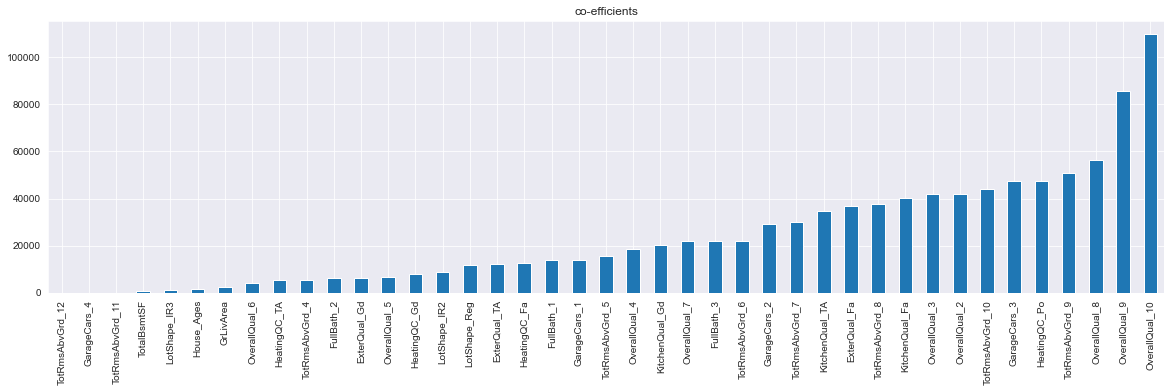

In [55]:
#extract the co-efficients to better understand the variables that display the largest absolute rate of change with respect to Sales_price
coeff_slope = regression_model.params[1:].abs()
#paramas = parameters of the model : (a,b parameters) y=ax+b
coeff_slope.sort_values(ascending=True).plot(kind='bar')
plt.title('co-efficients')
plt.show()

<b><span style="font-size:15px; color:orange">The coefficients are larger than one because our sales price variable is not normalized into scale (0,1).</span></b>

<b><span style="font-size:20px; color:red">Validate Predictions</span></b>

<b>Get the test table ready for prediction model</b>

In [56]:
test_table = pd.read_csv('test.csv') 
print(test_table)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [57]:
new_test_table =test_table.assign(House_Ages = lambda x: test_table['YrSold']-test_table['YearBuilt'])
print(new_test_table)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [58]:
test_independent_vars = ['House_Ages', 'TotalBsmtSF','GrLivArea','OverallQual','FullBath','TotRmsAbvGrd','GarageCars','LotShape', 'ExterQual','HeatingQC','KitchenQual'] 
test_independent_vars_table = new_test_table[test_independent_vars]
test_independent_vars_table

,House_Ages,TotalBsmtSF,GrLivArea,OverallQual,FullBath,TotRmsAbvGrd,GarageCars,LotShape,ExterQual,HeatingQC,KitchenQual
0,49,882.0,896,5,1,5,1.0,Reg,TA,TA,TA
1,52,1329.0,1329,6,1,6,1.0,IR1,TA,TA,Gd
2,13,928.0,1629,5,2,6,2.0,IR1,TA,Gd,TA
3,12,926.0,1604,6,2,7,2.0,IR1,TA,Ex,Gd
4,18,1280.0,1280,8,2,5,2.0,IR1,Gd,Ex,Gd
...,...,...,...,...,...,...,...,...,...,...,...
1454,36,546.0,1092,4,1,5,0.0,Reg,TA,Gd,TA
1455,36,546.0,1092,4,1,6,1.0,Reg,TA,TA,TA
1456,46,1224.0,1224,5,1,7,2.0,Reg,TA,Ex,TA
1457,14,912.0,970,5,1,6,0.0,Reg,TA,TA,TA


Cleanse the data, including dropping missing values, one-hot encoding and normalizing

In [59]:
#dropping missing values
test_independent_vars_table.dropna(subset=['TotalBsmtSF','GarageCars','KitchenQual'], inplace=True)
test_independent_vars_table.isnull().sum()

/Users/alex5629684/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


House_Ages      0
TotalBsmtSF     0
GrLivArea       0
OverallQual     0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
LotShape        0
ExterQual       0
HeatingQC       0
KitchenQual     0
dtype: int64

In [60]:
#one-hot encoding
discrete_var = ['OverallQual','FullBath','TotRmsAbvGrd','GarageCars','LotShape', 'ExterQual','HeatingQC','KitchenQual'] 
one_hot_test = test_independent_vars_table[discrete_var].copy() #copy to a new table
new_test_table_transformed_with_dummies = pd.get_dummies(data=one_hot_test, columns=discrete_var, drop_first=True)
print(new_test_table_transformed_with_dummies) #the new dummies columns were craeted to the new data frame

      OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
0                 0              0              0              1   
1                 0              0              0              0   
2                 0              0              0              1   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1454              0              0              1              0   
1455              0              0              1              0   
1456              0              0              0              1   
1457              0              0              0              1   
1458              0              0              0              0   

      OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  \
0                 0              0              0              0   
1                 1              0             

In [61]:
#remove the columns that the train data set doesn't have
#make the columns in the test and train data set consistent
new_test_table_transformed_with_dummies.drop(['FullBath_4','TotRmsAbvGrd_13','TotRmsAbvGrd_15','GarageCars_5.0'],axis='columns',inplace=True)

In [62]:
#normalizing
# fit scaler on test data
Numeric_distribution_normalized = ['House_Ages', 'TotalBsmtSF','GrLivArea'] 
norm = MinMaxScaler().fit(new_test_table[Numeric_distribution_normalized])
# transform test data
X_test_norm = norm.transform(new_test_table[Numeric_distribution_normalized])
#convert the np.array into df
X_test_norm_table=pd.DataFrame(X_test_norm, columns = Numeric_distribution_normalized)
print(X_test_norm_table)

      House_Ages  TotalBsmtSF  GrLivArea
0       0.384615     0.173111   0.104309
1       0.407692     0.260844   0.196672
2       0.107692     0.182139   0.260666
3       0.100000     0.181747   0.255333
4       0.146154     0.251227   0.186220
...          ...          ...        ...
1454    0.284615     0.107164   0.146118
1455    0.284615     0.107164   0.146118
1456    0.361538     0.240236   0.174275
1457    0.115385     0.178999   0.120094
1458    0.107692     0.195486   0.339804

[1459 rows x 3 columns]


In [63]:
#combine the one-hot encoded and normalized data
ready_test = pd.concat([X_test_norm_table, new_test_table_transformed_with_dummies], axis=1)
ready_test.dropna(subset=Numeric_distribution_normalized, inplace=True)
ready_test.dropna(subset=new_test_table_transformed_with_dummies.columns, inplace=True)
#Drop the row w/ missing values for the numeric & categorical columns
ready_test.isnull().sum()
#no missing values anymore
print(ready_test)

      House_Ages  TotalBsmtSF  GrLivArea  OverallQual_2  OverallQual_3  \
0       0.384615     0.173111   0.104309            0.0            0.0   
1       0.407692     0.260844   0.196672            0.0            0.0   
2       0.107692     0.182139   0.260666            0.0            0.0   
3       0.100000     0.181747   0.255333            0.0            0.0   
4       0.146154     0.251227   0.186220            0.0            0.0   
...          ...          ...        ...            ...            ...   
1454    0.284615     0.107164   0.146118            0.0            0.0   
1455    0.284615     0.107164   0.146118            0.0            0.0   
1456    0.361538     0.240236   0.174275            0.0            0.0   
1457    0.115385     0.178999   0.120094            0.0            0.0   
1458    0.107692     0.195486   0.339804            0.0            0.0   

      OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  \
0               0.0            1.0         

In [64]:
# add the constant numbers to independent variables 
ready_test = sm.add_constant(ready_test)
#predict the sales price
new_test_table['prediction'] = regression_model.predict(ready_test)
print(new_test_table)

/Users/alex5629684/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscF